13. **Can one define different classes of peaks based on the signal and its variation across cells?**
                                                    NK.27+11b-.BM  \
(ImmGenATAC1219.peak_1, chr1, 3020786, 0.0, 0.5...           0.82   
(ImmGenATAC1219.peak_2, chr1, 3087226, 0.0, 0.5...           1.46   
(ImmGenATAC1219.peak_3, chr1, 3120109, 0.07, 10...           0.20   
(ImmGenATAC1219.peak_4, chr1, 3121485, 0.15, 3....           1.72   
(ImmGenATAC1219.peak_5, chr1, 3372787, 0.03, 1....           0.20   
(ImmGenATAC1219.peak_6, chr1, 3399217, 0.06, 2....           1.46   
(ImmGenATAC1219.peak_7, chr1, 3400115, 0.44, 2....           0.82   
(ImmGenATAC1219.peak_8, chr1, 3416260, 0.01, 2....           1.10   
(ImmGenATAC1219.peak_9, chr1, 3434092, 0.18, 1....           2.68   
(ImmGenATAC1219.peak_10, chr1, 3434378, 0.15, 1...           1.72   

                                                    NK.27+11b+.BM  \
(ImmGenATAC1219.peak_1, chr1, 3020786, 0.0, 0.5...           0.22   


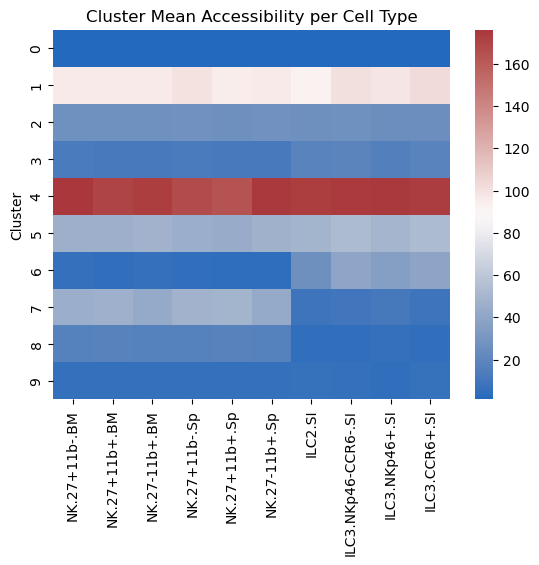

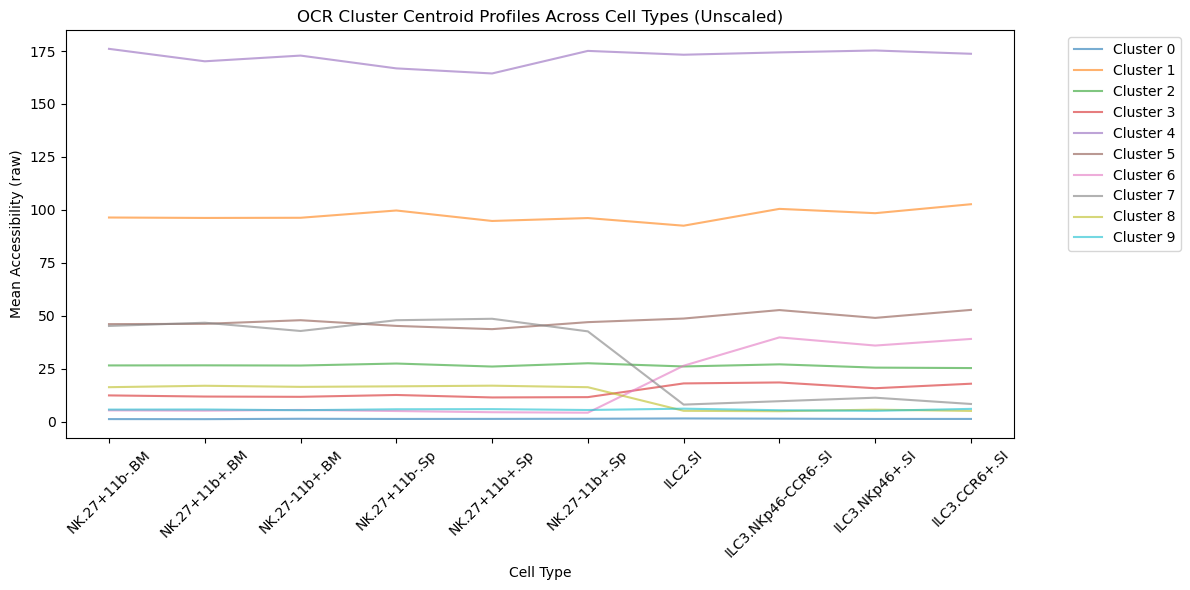

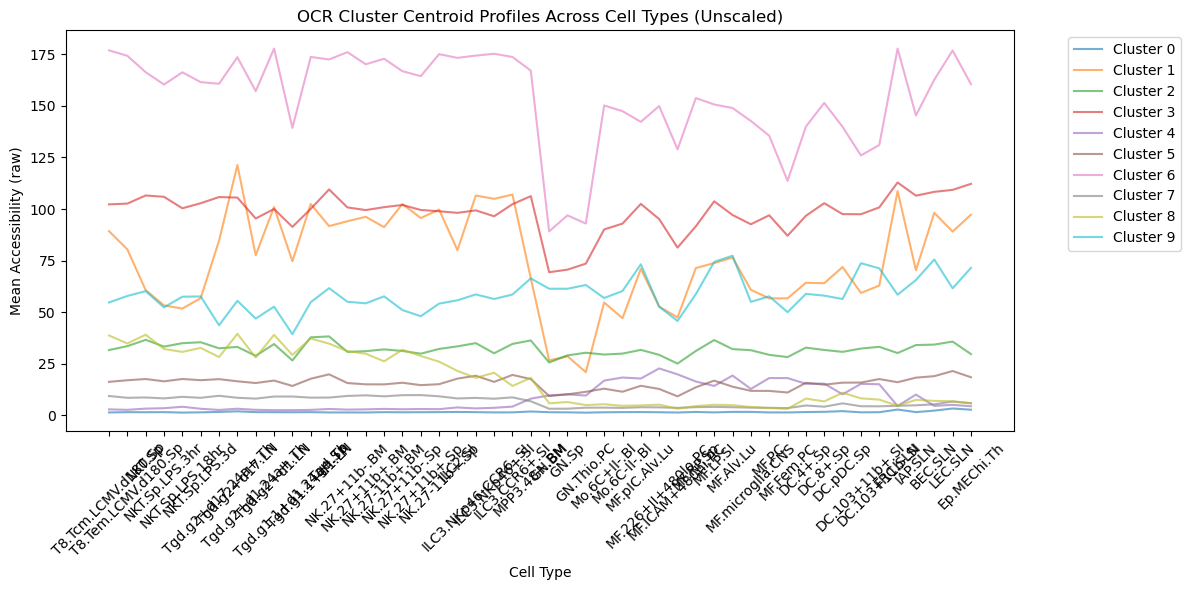

In [5]:
print("13. **Can one define different classes of peaks based on the signal and its variation across cells?**")

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df_raw = pd.read_csv("data/ImmGenATAC18_AllOCRsInfo.csv", header=0, quotechar='"', low_memory=False)

# Extract only the columns for NK and ILC. Only 5000 samples
df_expr = df_raw[['NK.27+11b-.BM', 'NK.27+11b+.BM', 'NK.27-11b+.BM', 'NK.27+11b-.Sp',
       'NK.27+11b+.Sp', 'NK.27-11b+.Sp', 'ILC2.SI', 'ILC3.NKp46-CCR6-.SI',
       'ILC3.NKp46+.SI', 'ILC3.CCR6+.SI']]
df_expr = df_expr.iloc[:5000, :]
df_expr.index = df_raw.iloc[:5000, :] 

print(df_expr[:10])

from sklearn.cluster import KMeans

k = 10  
kmeans = KMeans(n_clusters=k, random_state=42)
df_expr['Cluster'] = kmeans.fit_predict(df_expr)

cluster_means = df_expr.groupby('Cluster').mean()

# heatmap of the cluster means
sns.heatmap(cluster_means, cmap='vlag')
plt.title("Cluster Mean Accessibility per Cell Type")
plt.show()

# Cluster-Mittelwerte je Zelltyp (Zentroid-Profil)
cluster_profiles = df_expr.groupby('Cluster').mean()

# Plot: Zentroid-Profil für jedes Cluster
plt.figure(figsize=(12, 6))
for i, row in cluster_profiles.iterrows():
    plt.plot(row.index, row.values, label=f'Cluster {i}', alpha=0.6)

plt.xlabel("Cell Type")
plt.ylabel("Mean Accessibility (raw)")
plt.title("OCR Cluster Centroid Profiles Across Cell Types (Unscaled)")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
plt.tight_layout()
plt.show()

#the same but now compared to other cell types
df_expr2 = df_raw.iloc[:5000, 50:]
df_expr2.index = df_raw.iloc[:5000, :] 

#kmeans
k = 10  
kmeans = KMeans(n_clusters=k, random_state=42)
df_expr2['Cluster'] = kmeans.fit_predict(df_expr2)

cluster_means = df_expr.groupby('Cluster').mean()
# Cluster-Mittelwerte je Zelltyp (Zentroid-Profil)
cluster_profiles2 = df_expr2.groupby('Cluster').mean()

# Plot: Zentroid-Profil für jedes Cluster
plt.figure(figsize=(12, 6))
for i, row in cluster_profiles2.iterrows():
    plt.plot(row.index, row.values, label=f'Cluster {i}', alpha=0.6)

plt.xlabel("Cell Type")
plt.ylabel("Mean Accessibility (raw)")
plt.title("OCR Cluster Centroid Profiles Across Cell Types (Unscaled)")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
plt.tight_layout()
plt.show()